# **Análisis de correlación entre las variables**

- Martín Alejandro Hermosillo García
- Ana Sofía Luna De La Peña
- María Ximena Rocha Valle
- Marcos Esparza Arizpe 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats



### Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset=pd.read_excel('./drive/MyDrive/Colab Notebooks/dataset_cengage.xlsx', sheet_name='Results')


Mounted at /content/drive


### Eliminar datos en vacíos

In [ ]:
dataset.dtypes

Country                       object
Learning Consultant          float64
Opportunity ID               float64
Account                      float64
ISBN 13                      float64
Author                        object
Title                         object
Probability                   object
% de Avance                   object
Term                          object
New Course Takeaway Units    float64
Seats                        float64
Units                        float64
Revenue                      float64
Adjusted Revenue             float64
Technology                    object
Course Name                   object
Edition                      float64
Course ID                    float64
# of Courses                 float64
Customer                      object
profesores                   float64
dtype: object

In [ ]:
dataset.head()

,Country,Learning Consultant,Opportunity ID,Account,ISBN 13,Author,Title,Probability,% de Avance,Term,...,Units,Revenue,Adjusted Revenue,Technology,Course Name,Edition,Course ID,# of Courses,Customer,profesores
0,Mexico,15.0,5255970.0,77.0,9.786075e+12,Martinez,Literatura II,No_Aceptada,0,Aug-21,...,8929.0,1308277.08,0.0,NaN,LITERATURA COBACH,1.0,1847125.0,NaN,Potential Customer,3707.0
1,Mexico,11.0,5172372.0,434.0,9.781338e+12,Serway/Vuille,INTL IAC WA FUNDAMENTOS DE FIS ICA,Closed Sale,1,Jan-21,...,22.0,1161600.00,0.0,WebAssign,FISICA 1 PREPA U-ERRE,11.0,1905363.0,NaN,Potential Customer,3683.0
2,Mexico,7.0,4496314.0,333.0,9.786075e+12,CENGAGE,BIBLIOTECA DIGITAL MAGELLAN,No_Aceptada,0,Sep-20,...,2.0,779999.95,0.0,NaN,BIBLIOTECA DIGITAL,1.0,1873177.0,NaN,Potential Customer,5930.0
3,Mexico,1.0,5745690.0,479.0,9.786076e+12,GALINDO,MODELOS DE ORGANIZACIÓN,Evaluation Visit,0.75,May-22,...,2000.0,600000.00,0.0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416.0,NaN,Potential Customer,2540.0
4,Mexico,1.0,5745686.0,479.0,9.786076e+12,GALINDO,MODELOS DE ORGANIZACIÓN,Evaluation Visit,0.75,Jan-22,...,2000.0,600000.00,0.0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416.0,NaN,Potential Customer,2540.0


In [ ]:
dataset.tail()

,Country,Learning Consultant,Opportunity ID,Account,ISBN 13,Author,Title,Probability,% de Avance,Term,...,Units,Revenue,Adjusted Revenue,Technology,Course Name,Edition,Course ID,# of Courses,Customer,profesores
24858,Mexico,12.0,4852319.0,320.0,9.786075e+12,Serway/Jewett,Física para ciencias e ingeniería : Volumen 2,Identified Prospect,0,Feb-21,...,0.0,0.000000e+00,0.0,NaN,ELECTRICIDAD Y MAGNETISMO,10.0,1854306.0,NaN,Customer,1176.0
24859,Mexico,12.0,4852319.0,320.0,9.786075e+12,Serway/Jewett,Física para ciencias e ingeniería : Volumen 2,Identified Prospect,0,Feb-21,...,0.0,0.000000e+00,0.0,NaN,ELECTRICIDAD Y MAGNETISMO,10.0,1854306.0,NaN,Customer,3195.0
24860,Mexico,6.0,5811922.0,400.0,9.786075e+12,Serway/Vuille,Fundamentos de Física,Base_Vendida,Base Confirmada,Mar-22,...,28.0,0.000000e+00,0.0,NaN,FISICA 1,10.0,1871014.0,NaN,Customer,4386.0
24861,Mexico,14.0,5192448.0,469.0,9.786076e+12,Mankiw,MACROECONOMIA,Evaluation Visit,0.75,Feb-21,...,5.0,0.000000e+00,0.0,NaN,MACROECONOMIA,7.0,1906879.0,NaN,Potential Customer,1241.0
24862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.144840e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset = dataset.drop(dataset.index[24862])
dataset.tail()

,Country,Learning Consultant,Opportunity ID,Account,ISBN 13,Author,Title,Probability,% de Avance,Term,...,Units,Revenue,Adjusted Revenue,Technology,Course Name,Edition,Course ID,# of Courses,Customer,profesores
24857,Guatemala,13.0,5230342.0,83.0,NaN,NaN,NaN,Identified Prospect,0,Jan-21,...,0.0,0.0,0.0,NaN,Algebra Elemental,NaN,1889021.0,NaN,Potential Customer,4523.0
24858,Mexico,12.0,4852319.0,320.0,9.786075e+12,Serway/Jewett,Física para ciencias e ingeniería : Volumen 2,Identified Prospect,0,Feb-21,...,0.0,0.0,0.0,NaN,ELECTRICIDAD Y MAGNETISMO,10.0,1854306.0,NaN,Customer,1176.0
24859,Mexico,12.0,4852319.0,320.0,9.786075e+12,Serway/Jewett,Física para ciencias e ingeniería : Volumen 2,Identified Prospect,0,Feb-21,...,0.0,0.0,0.0,NaN,ELECTRICIDAD Y MAGNETISMO,10.0,1854306.0,NaN,Customer,3195.0
24860,Mexico,6.0,5811922.0,400.0,9.786075e+12,Serway/Vuille,Fundamentos de Física,Base_Vendida,Base Confirmada,Mar-22,...,28.0,0.0,0.0,NaN,FISICA 1,10.0,1871014.0,NaN,Customer,4386.0
24861,Mexico,14.0,5192448.0,469.0,9.786076e+12,Mankiw,MACROECONOMIA,Evaluation Visit,0.75,Feb-21,...,5.0,0.0,0.0,NaN,MACROECONOMIA,7.0,1906879.0,NaN,Potential Customer,1241.0


In [ ]:
op=dataset["ISBN 13"]
dataset.isnull().sum()

Country                          0
Learning Consultant              0
Opportunity ID                   0
Account                          0
ISBN 13                         18
Author                          18
Title                           18
Probability                      0
% de Avance                    363
Term                             0
New Course Takeaway Units    24862
Seats                            0
Units                            0
Revenue                          0
Adjusted Revenue                 0
Technology                   21757
Course Name                      0
Edition                         18
Course ID                        0
# of Courses                 24862
Customer                         0
profesores                       0
dtype: int64

In [ ]:
from sklearn import preprocessing
encoded_data=dataset.copy()
encoders = {}
encoder = preprocessing.LabelEncoder()
encoded_data["Probability"]= encoder.fit_transform(dataset["Probability"]) 
encoded_data

# creating initial dataframe
Prob = ('At Risk','Base_Confirmada','Base_Perdida','Base_Por_Confirmar','Base_Vendida','Closed Sale','Custom Adoption','Evaluation Visit','Identified Prospect','Interview','Muestra','No_Aceptada','Vendida')
bridge_df = pd.DataFrame(Prob, columns=['Probability'])# converting type of columns to 'category'
bridge_df['Probability'] = bridge_df['Probability'].astype('category')# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Probability'].cat.codes
bridge_df


,Probability,Bridge_Types_Cat
0,At Risk,0
1,Base_Confirmada,1
2,Base_Perdida,2
3,Base_Por_Confirmar,3
4,Base_Vendida,4
5,Closed Sale,5
6,Custom Adoption,6
7,Evaluation Visit,7
8,Identified Prospect,8
9,Interview,9


In [ ]:

encoders = {}
encoder = preprocessing.LabelEncoder()
encoded_data["Country"]= encoder.fit_transform(dataset["Country"]) 
encoded_data

,Country,Learning Consultant,Opportunity ID,Account,ISBN 13,Author,Title,Probability,% de Avance,Term,...,Units,Revenue,Adjusted Revenue,Technology,Course Name,Edition,Course ID,# of Courses,Customer,profesores
0,7,15.0,5255970.0,77.0,9.786075e+12,Martinez,Literatura II,11,0,Aug-21,...,8929.0,1308277.08,0.0,NaN,LITERATURA COBACH,1.0,1847125.0,NaN,Potential Customer,3707.0
1,7,11.0,5172372.0,434.0,9.781338e+12,Serway/Vuille,INTL IAC WA FUNDAMENTOS DE FIS ICA,5,1,Jan-21,...,22.0,1161600.00,0.0,WebAssign,FISICA 1 PREPA U-ERRE,11.0,1905363.0,NaN,Potential Customer,3683.0
2,7,7.0,4496314.0,333.0,9.786075e+12,CENGAGE,BIBLIOTECA DIGITAL MAGELLAN,11,0,Sep-20,...,2.0,779999.95,0.0,NaN,BIBLIOTECA DIGITAL,1.0,1873177.0,NaN,Potential Customer,5930.0
3,7,1.0,5745690.0,479.0,9.786076e+12,GALINDO,MODELOS DE ORGANIZACIÓN,7,0.75,May-22,...,2000.0,600000.00,0.0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416.0,NaN,Potential Customer,2540.0
4,7,1.0,5745686.0,479.0,9.786076e+12,GALINDO,MODELOS DE ORGANIZACIÓN,7,0.75,Jan-22,...,2000.0,600000.00,0.0,NaN,Estructuras organizacionales y gestión del con...,1.0,1934416.0,NaN,Potential Customer,2540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24857,5,13.0,5230342.0,83.0,NaN,NaN,NaN,8,0,Jan-21,...,0.0,0.00,0.0,NaN,Algebra Elemental,NaN,1889021.0,NaN,Potential Customer,4523.0
24858,7,12.0,4852319.0,320.0,9.786075e+12,Serway/Jewett,Física para ciencias e ingeniería : Volumen 2,8,0,Feb-21,...,0.0,0.00,0.0,NaN,ELECTRICIDAD Y MAGNETISMO,10.0,1854306.0,NaN,Customer,1176.0
24859,7,12.0,4852319.0,320.0,9.786075e+12,Serway/Jewett,Física para ciencias e ingeniería : Volumen 2,8,0,Feb-21,...,0.0,0.00,0.0,NaN,ELECTRICIDAD Y MAGNETISMO,10.0,1854306.0,NaN,Customer,3195.0
24860,7,6.0,5811922.0,400.0,9.786075e+12,Serway/Vuille,Fundamentos de Física,4,Base Confirmada,Mar-22,...,28.0,0.00,0.0,NaN,FISICA 1,10.0,1871014.0,NaN,Customer,4386.0


In [ ]:
encoded_data.pop("New Course Takeaway Units")
encoded_data.pop("Adjusted Revenue")
encoded_data.pop("# of Courses")
encoded_data.pop("Author")
encoded_data.pop("Title")

0                                        Literatura II
1                   INTL IAC WA FUNDAMENTOS DE FIS ICA
2                          BIBLIOTECA DIGITAL MAGELLAN
3                              MODELOS DE ORGANIZACIÓN
4                              MODELOS DE ORGANIZACIÓN
                             ...                      
24857                                              NaN
24858    Física para ciencias e ingeniería : Volumen 2
24859    Física para ciencias e ingeniería : Volumen 2
24860                            Fundamentos de Física
24861                                    MACROECONOMIA
Name: Title, Length: 24862, dtype: object

**¿Porqué se removieron estas variables?**

Se removieron 5 variables, las cuales son: "New Course Takeaway Units", "Adjusted Revenue", "# of Courses" y "Author" "Title". Justificando la razón del por que se reomvió la primera variable, es por que su columna se encuentra vacía, mientras que la segunda columna son únicamente ceros. Hablando acerca de la tercera, cuarta y quinta, estas se removieron debido a que se pueden encontrar esos datos en el sitio web de cengage utilizando el ISBN-13. 

### **Gráfica de Correlaciones**

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24862 entries, 0 to 24861
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              24862 non-null  int64  
 1   Learning Consultant  24862 non-null  float64
 2   Opportunity ID       24862 non-null  float64
 3   Account              24862 non-null  float64
 4   ISBN 13              24844 non-null  float64
 5   Probability          24862 non-null  int64  
 6   % de Avance          24499 non-null  object 
 7   Term                 24862 non-null  object 
 8   Seats                24862 non-null  float64
 9   Units                24862 non-null  float64
 10  Revenue              24862 non-null  float64
 11  Technology           3105 non-null   object 
 12  Course Name          24862 non-null  object 
 13  Edition              24844 non-null  float64
 14  Course ID            24862 non-null  float64
 15  Customer             24862 non-null 

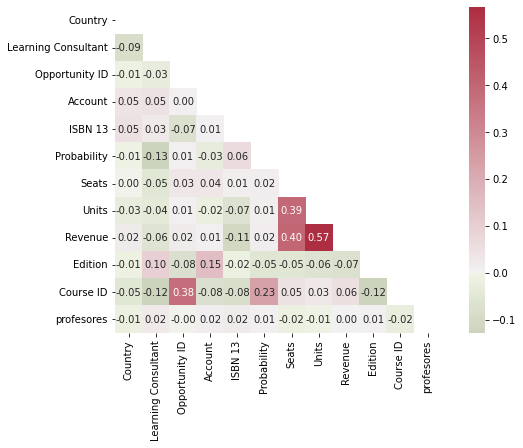

In [ ]:
corr =  encoded_data.corr()

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();


### **Relación entre Variables**

En la matriz de correlaciones se puede apreciar que muchas de las variables no tienen ninguna correlación entre si, a excepción de unas pocas. Sin embargo, a pesar de que estas variables tienen una correlación relativamente alta, el valor sigue siendo considerablemente menor a lo esperado. De acuerdo a lo explicado por el Socio Formador los "units" y el "revenue", dependen completamente de los "seats" establecidos por el vendedor, en consecuencia se esperaría que estas tres variables tuviesen una correlación mucho mayor. Lo apropiado sería revisar con el Socio Formador si es que hay una manera estandarizada de rellenar los "seats" de acuerdo con la cantidad de alumnos que tiene cada profesor. Otra relación que es importante revisar es la que hay entre "Course ID" y "Probability" para poder determinar si hay algún curso o materia de la que se compren mas libros. 